In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/rizkidewanto/pisang

Cloning into 'pisang'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 395 (delta 109), reused 363 (delta 86), pack-reused 0
Receiving objects: 100% (395/395), 33.53 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [0]:
%cd pisang
#!python3 setup.py build_ext --inplace
!pip install -e .
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar #Nantinya Download dataset pisang
!tar xf VOCtrainval_11-May-2012.tar

/content/pisang/darkflow
Obtaining file:///content/pisang/darkflow
  Running setup.py develop for darkflow
--2019-04-16 23:23:08--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  12.2MB/s    in 12m 9s  

2019-04-16 23:35:18 (2.62 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [0]:
#Train menggunakan CPU
#!flow --model cfg/yolo.cfg --train --dataset "VOCdevkit/VOC2012/JPEGImages" --annotation "VOCdevkit/VOC2012/Annotations"

#Train menggunakan GPU
!flow --model cfg/yolo-voc.cfg --train --dataset "VOCdevkit/VOC2012/JPEGImages" --annotation "VOCdevkit/VOC2012/Annotations" --gpu 1


Parsing cfg/yolo-voc.cfg
Loading None ...
Finished in 0.00017142295837402344s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Y

In [32]:
#Test Image Folder
#!wget https://pjreddie.com/media/files/yolov2-voc.weights
!flow --imgdir "VOCdevkit/VOC2012/JPEGImages/" --load -1 --model cfg/yolo-voc.cfg --gpu 1 --threshold 0.6 --json


Parsing cfg/yolo-voc.cfg
Loading None ...
Finished in 0.0002224445343017578s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Ye

In [39]:
%cd VOCdevkit/VOC2012/JPEGImages/out
!ls

/content/pisang/darkflow/VOCdevkit/VOC2012/JPEGImages/out
2007_000027.jpg   2008_007119.jpg   2010_001501.jpg   2011_002987.jpg
2007_000027.json  2008_007119.json  2010_001501.json  2011_002987.json
2007_000032.jpg   2008_007120.jpg   2010_001502.jpg   2011_002988.jpg
2007_000032.json  2008_007120.json  2010_001502.json  2011_002988.json
2007_000033.jpg   2008_007123.jpg   2010_001503.jpg   2011_002992.jpg
2007_000033.json  2008_007123.json  2010_001503.json  2011_002992.json
2007_000039.jpg   2008_007124.jpg   2010_001505.jpg   2011_002993.jpg
2007_000039.json  2008_007124.json  2010_001505.json  2011_002993.json
2007_000042.jpg   2008_007129.jpg   2010_001511.jpg   2011_002994.jpg
2007_000042.json  2008_007129.json  2010_001511.json  2011_002994.json
2007_000061.jpg   2008_007130.jpg   2010_001514.jpg   2011_002996.jpg
2007_000061.json  2008_007130.json  2010_001514.json  2011_002996.json
2007_000063.jpg   2008_007131.jpg   2010_001515.jpg   2011_002997.jpg
2007_000063.json  2008_007

[]

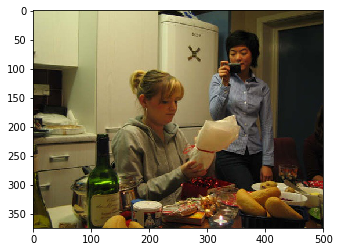

In [41]:
import matplotlib.pyplot as plt
a=plt.imread("2008_007168.jpg")
plt.imshow(a)
!cat 2008_007168.json

In [0]:
#Test Single Image
from darkflow.net.build import TFNet
import cv2

options = {"model": "cfg/yolo-voc.cfg", "load": -1, "threshold": 0.1}

tfnet = TFNet(options)

imgcv = cv2.imread("./sample_img/sample_dog.jpg")
result = tfnet.return_predict(imgcv)
print(result)